In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#worldcloud
from wordcloud import WordCloud
import re
import string
%matplotlib inline
pd.set_option('display.max_colwidth', 100)

# Tweet pre-processor
# !pip install tweet-preprocessor
import preprocessor as p

#vaderSentiment
# !pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# NLTK
# !pip install nltk
import nltk
nltk.download('vader_lexicon')
from nltk import sent_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as sia
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')
nltk.download('words')

# TextBlob
# !pip install textblob
from textblob import TextBlob, Word

# Stanza
# !pip install Stanza
import stanza
stanza.download('en')
import warnings

#NeatText
#!pip install neattext
import neattext.functions as nfx

#Spacy
#!pip install spacy
import spacy

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

[nltk_data] Downloading package vader_lexicon to C:\Users\Zainab
[nltk_data]     Zaman\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Zainab
[nltk_data]     Zaman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Zainab
[nltk_data]     Zaman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Zainab
[nltk_data]     Zaman\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Zainab Zaman\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package words to C:\Users\Zainab
[nltk_data]     Zaman\AppData\Roaming\nltk_data...
[nltk_da

In [2]:
data = pd.read_csv('covidvaccine_tweet.csv')
print(data.shape)

(10001, 4)


In [3]:
data.isnull().any()

Datetime    False
Tweet Id    False
Text        False
Username    False
dtype: bool

In [4]:
data.dtypes

Datetime    object
Tweet Id     int64
Text        object
Username    object
dtype: object

In [5]:
data.head()

,Datetime,Tweet Id,Text,Username
0,2021-10-29 23:59:59+00:00,1454236603551977477,@njs44 Double jabbed in the hospital #COVID is not over I wish him well \n\nI hope he recovers f...,HassSamm
1,2021-10-29 23:59:55+00:00,1454236587655634951,@debjcoons1 @Borys_Kit @kimmasters If your opinion of a person can be altered based on their cov...,MikeJay97
2,2021-10-29 23:59:52+00:00,1454236575345283072,"@C_Smith951 @annniebuhr @AP In the US alone 202 kids age 0-4 have died, 455 age 5-18. The vaccin...",elkabong82
3,2021-10-29 23:59:50+00:00,1454236567497674755,@Lewislama Now yr gaslighting. No one ever said anything was risk free. 32.7 million doses of CO...,derekgould111
4,2021-10-29 23:59:46+00:00,1454236550246682626,Got my covid booster shot yesterday. \nThe only side effect has been slight soreness at the inje...,onepunchtoomany


In [6]:
#converting column names and text data to lower case
data.columns = data.columns.str.replace(' ','_')
data.columns = data.columns.str.lower()
data.columns
data['text'] = data['text'].str.lower()
data.head()

,datetime,tweet_id,text,username
0,2021-10-29 23:59:59+00:00,1454236603551977477,@njs44 double jabbed in the hospital #covid is not over i wish him well \n\ni hope he recovers f...,HassSamm
1,2021-10-29 23:59:55+00:00,1454236587655634951,@debjcoons1 @borys_kit @kimmasters if your opinion of a person can be altered based on their cov...,MikeJay97
2,2021-10-29 23:59:52+00:00,1454236575345283072,"@c_smith951 @annniebuhr @ap in the us alone 202 kids age 0-4 have died, 455 age 5-18. the vaccin...",elkabong82
3,2021-10-29 23:59:50+00:00,1454236567497674755,@lewislama now yr gaslighting. no one ever said anything was risk free. 32.7 million doses of co...,derekgould111
4,2021-10-29 23:59:46+00:00,1454236550246682626,got my covid booster shot yesterday. \nthe only side effect has been slight soreness at the inje...,onepunchtoomany


Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

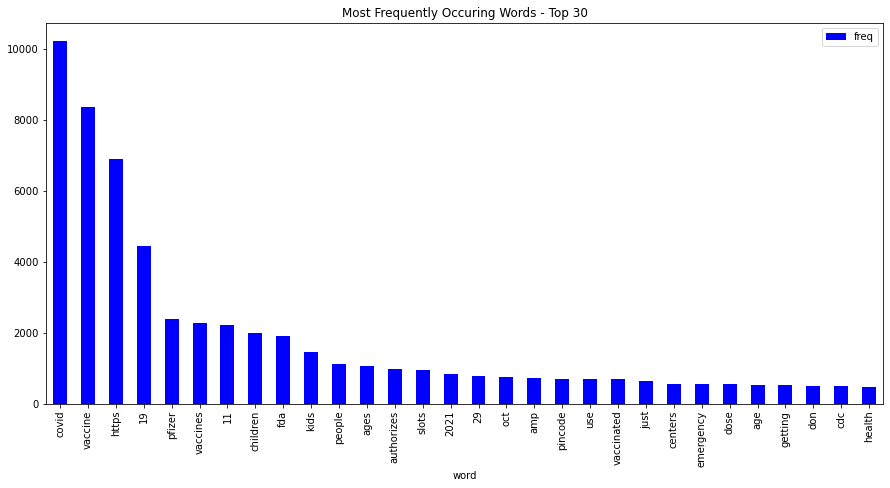

In [7]:
#checking frequency of words

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data.text)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

In [8]:
# collecting the hashtags

def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [9]:
# extracting hashtags from non racist tweets
HT_regular = hashtag_extract(data['text'])
# unnesting list
HT_regular = sum(HT_regular,[])

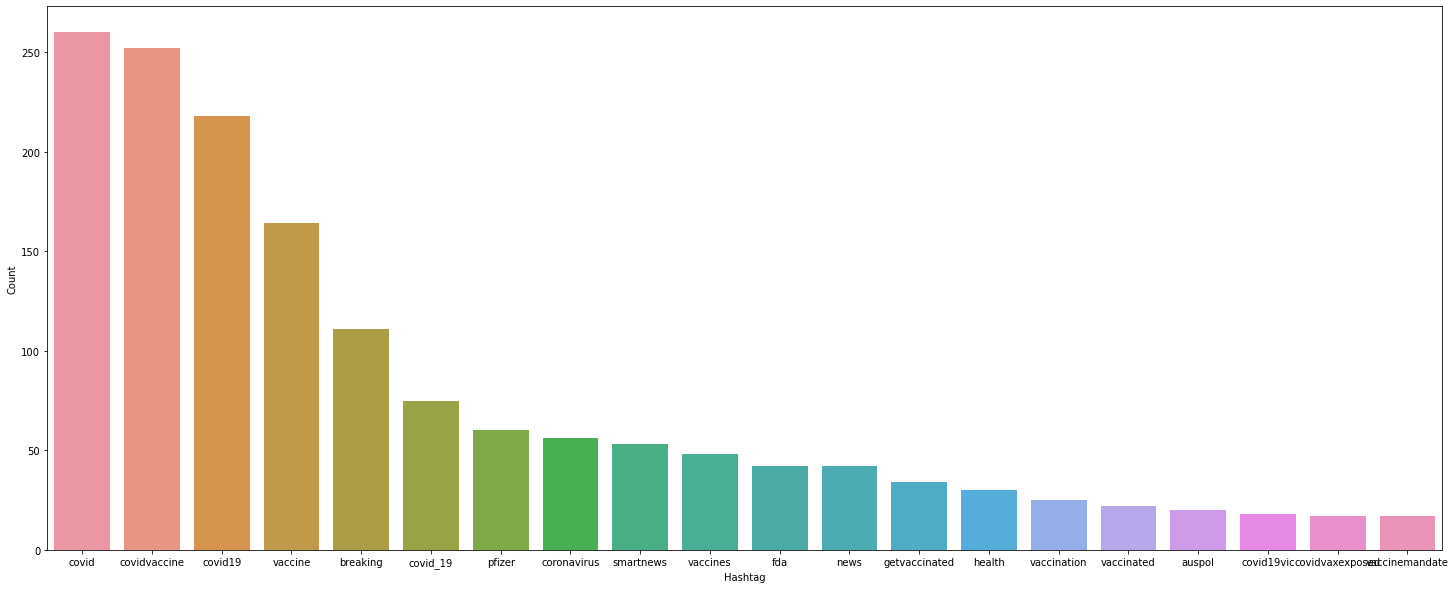

In [10]:


a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 

plt.figure(figsize=(25,10))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [11]:
data1 = data[(data['text'].str.contains("COVIDVaccine")) 
                            | (data['text'].str.contains("vaccines"))
                            | (data['text'].str.contains("covidvaccine"))
                            | (data['text'].str.contains("vaccination"))
                            | (data['text'].str.contains("GetVaccinated"))
                            | (data['text'].str.contains("Pfizer"))
                            | (data['text'].str.contains("astrazeneca"))
                            | (data['text'].str.contains("sinopharm"))
                            | (data['text'].str.contains("doses"))
                            | (data['text'].str.contains("pakistan"))
                            | (data['text'].str.contains("positive"))
                            | (data['text'].str.contains("approves"))]
                      
len(data1)

2893

In [12]:
# Cleaning Text: Removing Hashtags
data['cleantweet1']=data['text'].apply(nfx.remove_hashtags)
data.head()

,datetime,tweet_id,text,username,cleantweet1
0,2021-10-29 23:59:59+00:00,1454236603551977477,@njs44 double jabbed in the hospital #covid is not over i wish him well \n\ni hope he recovers f...,HassSamm,@njs44 double jabbed in the hospital is not over i wish him well \n\ni hope he recovers from c...
1,2021-10-29 23:59:55+00:00,1454236587655634951,@debjcoons1 @borys_kit @kimmasters if your opinion of a person can be altered based on their cov...,MikeJay97,@debjcoons1 @borys_kit @kimmasters if your opinion of a person can be altered based on their cov...
2,2021-10-29 23:59:52+00:00,1454236575345283072,"@c_smith951 @annniebuhr @ap in the us alone 202 kids age 0-4 have died, 455 age 5-18. the vaccin...",elkabong82,"@c_smith951 @annniebuhr @ap in the us alone 202 kids age 0-4 have died, 455 age 5-18. the vaccin..."
3,2021-10-29 23:59:50+00:00,1454236567497674755,@lewislama now yr gaslighting. no one ever said anything was risk free. 32.7 million doses of co...,derekgould111,@lewislama now yr gaslighting. no one ever said anything was risk free. 32.7 million doses of co...
4,2021-10-29 23:59:46+00:00,1454236550246682626,got my covid booster shot yesterday. \nthe only side effect has been slight soreness at the inje...,onepunchtoomany,got my covid booster shot yesterday. \nthe only side effect has been slight soreness at the inje...


In [13]:
# Cleaning Text: Removing User handles
data['cleantweet1']=data['cleantweet1'].apply(lambda x: nfx.remove_userhandles(x))

In [14]:
# Cleaning Text: Removing Multiple spaces
data['cleantweet1']=data['cleantweet1'].apply(lambda x: nfx.remove_multiple_spaces(x))

In [15]:
# Cleaning Text: Removing URLs
data['cleantweet1']=data['cleantweet1'].apply(lambda x: nfx.remove_urls(x))

In [16]:
#determining sentence length in text
data['Sentence_Length'] = data['cleantweet1'].apply(lambda x: len(sent_tokenize(x)))
data.head()

,datetime,tweet_id,text,username,cleantweet1,Sentence_Length
0,2021-10-29 23:59:59+00:00,1454236603551977477,@njs44 double jabbed in the hospital #covid is not over i wish him well \n\ni hope he recovers f...,HassSamm,double jabbed in the hospital is not over i wish him well i hope he recovers from covid vaxx 🙏💪...,1
1,2021-10-29 23:59:55+00:00,1454236587655634951,@debjcoons1 @borys_kit @kimmasters if your opinion of a person can be altered based on their cov...,MikeJay97,if your opinion of a person can be altered based on their covid vaccine status then you're a pi...,2
2,2021-10-29 23:59:52+00:00,1454236575345283072,"@c_smith951 @annniebuhr @ap in the us alone 202 kids age 0-4 have died, 455 age 5-18. the vaccin...",elkabong82,"in the us alone 202 kids age 0-4 have died, 455 age 5-18. the vaccine is safe. covid is not. if...",3
3,2021-10-29 23:59:50+00:00,1454236567497674755,@lewislama now yr gaslighting. no one ever said anything was risk free. 32.7 million doses of co...,derekgould111,now yr gaslighting. no one ever said anything was risk free. 32.7 million doses of covid-19 vac...,5
4,2021-10-29 23:59:46+00:00,1454236550246682626,got my covid booster shot yesterday. \nthe only side effect has been slight soreness at the inje...,onepunchtoomany,got my covid booster shot yesterday. the only side effect has been slight soreness at the inject...,3


In [17]:
column = data["Sentence_Length"]
max_value = column. max() 
print(max_value)

11


In [18]:
#determining word count in text
data['Word Counts'] = data['text'].apply(lambda x: len([i for i in x.split()]))
data.head()

,datetime,tweet_id,text,username,cleantweet1,Sentence_Length,Word Counts
0,2021-10-29 23:59:59+00:00,1454236603551977477,@njs44 double jabbed in the hospital #covid is not over i wish him well \n\ni hope he recovers f...,HassSamm,double jabbed in the hospital is not over i wish him well i hope he recovers from covid vaxx 🙏💪...,1,39
1,2021-10-29 23:59:55+00:00,1454236587655634951,@debjcoons1 @borys_kit @kimmasters if your opinion of a person can be altered based on their cov...,MikeJay97,if your opinion of a person can be altered based on their covid vaccine status then you're a pi...,2,25
2,2021-10-29 23:59:52+00:00,1454236575345283072,"@c_smith951 @annniebuhr @ap in the us alone 202 kids age 0-4 have died, 455 age 5-18. the vaccin...",elkabong82,"in the us alone 202 kids age 0-4 have died, 455 age 5-18. the vaccine is safe. covid is not. if...",3,38
3,2021-10-29 23:59:50+00:00,1454236567497674755,@lewislama now yr gaslighting. no one ever said anything was risk free. 32.7 million doses of co...,derekgould111,now yr gaslighting. no one ever said anything was risk free. 32.7 million doses of covid-19 vac...,5,49
4,2021-10-29 23:59:46+00:00,1454236550246682626,got my covid booster shot yesterday. \nthe only side effect has been slight soreness at the inje...,onepunchtoomany,got my covid booster shot yesterday. the only side effect has been slight soreness at the inject...,3,46


In [19]:
column = data["Word Counts"]
max_value = column. max() 
print(max_value)

101


In [20]:
#determining character count in text
def characterCount(text):
    characterLen = 0
    for i in text.split():
        characterLen += len(i)
    return characterLen

data['character_count'] = data['text'].apply(lambda x: characterCount(x))
data.head()

,datetime,tweet_id,text,username,cleantweet1,Sentence_Length,Word Counts,character_count
0,2021-10-29 23:59:59+00:00,1454236603551977477,@njs44 double jabbed in the hospital #covid is not over i wish him well \n\ni hope he recovers f...,HassSamm,double jabbed in the hospital is not over i wish him well i hope he recovers from covid vaxx 🙏💪...,1,39,174
1,2021-10-29 23:59:55+00:00,1454236587655634951,@debjcoons1 @borys_kit @kimmasters if your opinion of a person can be altered based on their cov...,MikeJay97,if your opinion of a person can be altered based on their covid vaccine status then you're a pi...,2,25,135
2,2021-10-29 23:59:52+00:00,1454236575345283072,"@c_smith951 @annniebuhr @ap in the us alone 202 kids age 0-4 have died, 455 age 5-18. the vaccin...",elkabong82,"in the us alone 202 kids age 0-4 have died, 455 age 5-18. the vaccine is safe. covid is not. if...",3,38,164
3,2021-10-29 23:59:50+00:00,1454236567497674755,@lewislama now yr gaslighting. no one ever said anything was risk free. 32.7 million doses of co...,derekgould111,now yr gaslighting. no one ever said anything was risk free. 32.7 million doses of covid-19 vac...,5,49,241
4,2021-10-29 23:59:46+00:00,1454236550246682626,got my covid booster shot yesterday. \nthe only side effect has been slight soreness at the inje...,onepunchtoomany,got my covid booster shot yesterday. the only side effect has been slight soreness at the inject...,3,46,228


In [21]:
column = data["character_count"]
max_value = column. max() 
print(max_value)

870


In [22]:
#determining stop words( stop wordsdoes not add much information to the text)
from spacy.lang.en.stop_words import STOP_WORDS
data['Stop Words'] = data['text'].apply(lambda x: len([i for i in x.split() if i not in STOP_WORDS]))
data.head()

,datetime,tweet_id,text,username,cleantweet1,Sentence_Length,Word Counts,character_count,Stop Words
0,2021-10-29 23:59:59+00:00,1454236603551977477,@njs44 double jabbed in the hospital #covid is not over i wish him well \n\ni hope he recovers f...,HassSamm,double jabbed in the hospital is not over i wish him well i hope he recovers from covid vaxx 🙏💪...,1,39,174,24
1,2021-10-29 23:59:55+00:00,1454236587655634951,@debjcoons1 @borys_kit @kimmasters if your opinion of a person can be altered based on their cov...,MikeJay97,if your opinion of a person can be altered based on their covid vaccine status then you're a pi...,2,25,135,14
2,2021-10-29 23:59:52+00:00,1454236575345283072,"@c_smith951 @annniebuhr @ap in the us alone 202 kids age 0-4 have died, 455 age 5-18. the vaccin...",elkabong82,"in the us alone 202 kids age 0-4 have died, 455 age 5-18. the vaccine is safe. covid is not. if...",3,38,164,21
3,2021-10-29 23:59:50+00:00,1454236567497674755,@lewislama now yr gaslighting. no one ever said anything was risk free. 32.7 million doses of co...,derekgould111,now yr gaslighting. no one ever said anything was risk free. 32.7 million doses of covid-19 vac...,5,49,241,29
4,2021-10-29 23:59:46+00:00,1454236550246682626,got my covid booster shot yesterday. \nthe only side effect has been slight soreness at the inje...,onepunchtoomany,got my covid booster shot yesterday. the only side effect has been slight soreness at the inject...,3,46,228,27


In [23]:
column = data["Stop Words"]
max_value = column. max() 
print(max_value)

81


In [24]:
# This will convert all contraction's to expansion
contractions = {"ain't": "am not", "aren't": "are not", "can't": "cannot", "could've": "could have",
                "couldn't": "could not", "didn't": "did not", "doesn't": "does not", "don't": "do not",
                "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he had",
                "he'll": "he will", "he's": "he is", "how'd": "how did", "how'll": "how will",
                "how's": "how is", "I'd": "I had", "I'll": "I will", "I'm": "I am",
                "I've": "I have", "isn't": "is not", "it'd": "it would", "it'll": "it shall",
                "it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not",
                "might've": "might have", "mightn't": "might not", "must've": "must have", "mustn't": "must not",
                "she'd": "she would", "she'll": "she shall ", "she's": "she is", "should've": "should have",
                "shouldn't": "should not", "so've": "so have", "so's": "so is", "that'd": "that would",
                "that's": "that is", "there'd": "there would", "there's": "there is", "they'd": "they had",
                "they'll": "they will", "they're": "they are", "they've": "they have", "to've": "to have",
                "wasn't": "was not", "we'd": "we had", "we'll": "we will", "we're": "we are",
                "we've": "we have", "weren't": "were not", "what'll": "what will", "what're": "what are",
                "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have",
                "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will",
                "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have",
                "will've": "will have", "won't": "will not", "would've": "would have", "wouldn't": "would not",
                "y'all": "you all", "you'd": "you had / you would", "you'll": "you will", "you're": "you are",
                "you've": "you have"}

def cont_to_exp(x):
    if type(x) is str:
        for key in contractions:
            value=contractions[key]
            x=x.replace(key,value)
        return x
    else:
        return x
    
data['text'] = data['text'].apply(lambda x: cont_to_exp(x))
data.head()

,datetime,tweet_id,text,username,cleantweet1,Sentence_Length,Word Counts,character_count,Stop Words
0,2021-10-29 23:59:59+00:00,1454236603551977477,@njs44 double jabbed in the hospital #covid is not over i wish him well \n\ni hope he recovers f...,HassSamm,double jabbed in the hospital is not over i wish him well i hope he recovers from covid vaxx 🙏💪...,1,39,174,24
1,2021-10-29 23:59:55+00:00,1454236587655634951,@debjcoons1 @borys_kit @kimmasters if your opinion of a person can be altered based on their cov...,MikeJay97,if your opinion of a person can be altered based on their covid vaccine status then you're a pi...,2,25,135,14
2,2021-10-29 23:59:52+00:00,1454236575345283072,"@c_smith951 @annniebuhr @ap in the us alone 202 kids age 0-4 have died, 455 age 5-18. the vaccin...",elkabong82,"in the us alone 202 kids age 0-4 have died, 455 age 5-18. the vaccine is safe. covid is not. if...",3,38,164,21
3,2021-10-29 23:59:50+00:00,1454236567497674755,@lewislama now yr gaslighting. no one ever said anything was risk free. 32.7 million doses of co...,derekgould111,now yr gaslighting. no one ever said anything was risk free. 32.7 million doses of covid-19 vac...,5,49,241,29
4,2021-10-29 23:59:46+00:00,1454236550246682626,got my covid booster shot yesterday. \nthe only side effect has been slight soreness at the inje...,onepunchtoomany,got my covid booster shot yesterday. the only side effect has been slight soreness at the inject...,3,46,228,27


In [25]:
#text preprocessing 

stop_words = stopwords.words('english')
custom_stopwords = ['RT']

def cleanUpTweets(txt, custom_stopwords):
    PT = txt
    PT.replace('[\w\s]','')
    PT = " ".join(word for word in PT.split() if word not in stop_words)
    PT = " ".join(word for word in PT.split() if word not in custom_stopwords)
    PT = " ".join(Word(word).lemmatize() for word in PT.split())
    
    return PT

def cleanUpTweets02(txt):
    txt = re.sub(r'@[A-Za-z0-9_]+','',txt)
    txt = re.sub(r'#','',txt)
    txt = re.sub(r'RT :','',txt)    
    txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+','',txt)
    return txt

data['processedtweets']= data['text'].apply(lambda x:cleanUpTweets(x, custom_stopwords))
data['cleaned']=data['processedtweets'].apply(cleanUpTweets02)

#remove punctuation
def remove_punct(a):
    remove_punct = [char for char in a if char not in string.punctuation]
    remove_punct = ''.join(remove_punct)
    return remove_punct

data['cleaned'] = data['cleaned'].apply(remove_punct)
data.head

<bound method NDFrame.head of                         datetime             tweet_id  \
0      2021-10-29 23:59:59+00:00  1454236603551977477   
1      2021-10-29 23:59:55+00:00  1454236587655634951   
2      2021-10-29 23:59:52+00:00  1454236575345283072   
3      2021-10-29 23:59:50+00:00  1454236567497674755   
4      2021-10-29 23:59:46+00:00  1454236550246682626   
...                          ...                  ...   
9996   2021-10-29 18:11:28+00:00  1454148898386284551   
9997   2021-10-29 18:11:22+00:00  1454148871983042560   
9998   2021-10-29 18:11:20+00:00  1454148863372181508   
9999   2021-10-29 18:11:19+00:00  1454148857361747971   
10000  2021-10-29 18:11:17+00:00  1454148849270939656   

                                                                                                      text  \
0      @njs44 double jabbed in the hospital #covid is not over i wish him well \n\ni hope he recovers f...   
1      @debjcoons1 @borys_kit @kimmasters if your opinion of a pe

In [26]:
#dropping unnecessary columns
data.drop(['tweet_id', 'username'], axis = 1, inplace=True)
data.head()

,datetime,text,cleantweet1,Sentence_Length,Word Counts,character_count,Stop Words,processedtweets,cleaned
0,2021-10-29 23:59:59+00:00,@njs44 double jabbed in the hospital #covid is not over i wish him well \n\ni hope he recovers f...,double jabbed in the hospital is not over i wish him well i hope he recovers from covid vaxx 🙏💪...,1,39,174,24,@njs44 double jabbed hospital #covid wish well hope recovers covid vaxx 🙏💪 gov want admit #vacci...,double jabbed hospital covid wish well hope recovers covid vaxx 🙏💪 gov want admit vaccines incr...
1,2021-10-29 23:59:55+00:00,@debjcoons1 @borys_kit @kimmasters if your opinion of a person can be altered based on their cov...,if your opinion of a person can be altered based on their covid vaccine status then you're a pi...,2,25,135,14,@debjcoons1 @borys_kit @kimmasters opinion person altered based covid vaccine status piece shit....,opinion person altered based covid vaccine status piece shit congratulations
2,2021-10-29 23:59:52+00:00,"@c_smith951 @annniebuhr @ap in the us alone 202 kids age 0-4 have died, 455 age 5-18. the vaccin...","in the us alone 202 kids age 0-4 have died, 455 age 5-18. the vaccine is safe. covid is not. if...",3,38,164,21,"@c_smith951 @annniebuhr @ap u alone 202 kid age 0-4 died, 455 age 5-18. vaccine safe. covid not....",u alone 202 kid age 04 died 455 age 518 vaccine safe covid not stay around eventually variant...
3,2021-10-29 23:59:50+00:00,@lewislama now yr gaslighting. no one ever said anything was risk free. 32.7 million doses of co...,now yr gaslighting. no one ever said anything was risk free. 32.7 million doses of covid-19 vac...,5,49,241,29,@lewislama yr gaslighting. one ever said anything risk free. 32.7 million dos covid-19 vaccine g...,yr gaslighting one ever said anything risk free 327 million dos covid19 vaccine given far tga f...
4,2021-10-29 23:59:46+00:00,got my covid booster shot yesterday. \nthe only side effect has been slight soreness at the inje...,got my covid booster shot yesterday. the only side effect has been slight soreness at the inject...,3,46,228,27,"got covid booster shot yesterday. side effect slight soreness injection site. super powers, meta...",got covid booster shot yesterday side effect slight soreness injection site super powers metal d...


In [27]:
#dropping duplicates
data.drop_duplicates(subset=['cleaned'])
#dropping null entries
data.dropna(subset=['cleaned'], inplace=True)
data

,datetime,text,cleantweet1,Sentence_Length,Word Counts,character_count,Stop Words,processedtweets,cleaned
0,2021-10-29 23:59:59+00:00,@njs44 double jabbed in the hospital #covid is not over i wish him well \n\ni hope he recovers f...,double jabbed in the hospital is not over i wish him well i hope he recovers from covid vaxx 🙏💪...,1,39,174,24,@njs44 double jabbed hospital #covid wish well hope recovers covid vaxx 🙏💪 gov want admit #vacci...,double jabbed hospital covid wish well hope recovers covid vaxx 🙏💪 gov want admit vaccines incr...
1,2021-10-29 23:59:55+00:00,@debjcoons1 @borys_kit @kimmasters if your opinion of a person can be altered based on their cov...,if your opinion of a person can be altered based on their covid vaccine status then you're a pi...,2,25,135,14,@debjcoons1 @borys_kit @kimmasters opinion person altered based covid vaccine status piece shit....,opinion person altered based covid vaccine status piece shit congratulations
2,2021-10-29 23:59:52+00:00,"@c_smith951 @annniebuhr @ap in the us alone 202 kids age 0-4 have died, 455 age 5-18. the vaccin...","in the us alone 202 kids age 0-4 have died, 455 age 5-18. the vaccine is safe. covid is not. if...",3,38,164,21,"@c_smith951 @annniebuhr @ap u alone 202 kid age 0-4 died, 455 age 5-18. vaccine safe. covid not....",u alone 202 kid age 04 died 455 age 518 vaccine safe covid not stay around eventually variant...
3,2021-10-29 23:59:50+00:00,@lewislama now yr gaslighting. no one ever said anything was risk free. 32.7 million doses of co...,now yr gaslighting. no one ever said anything was risk free. 32.7 million doses of covid-19 vac...,5,49,241,29,@lewislama yr gaslighting. one ever said anything risk free. 32.7 million dos covid-19 vaccine g...,yr gaslighting one ever said anything risk free 327 million dos covid19 vaccine given far tga f...
4,2021-10-29 23:59:46+00:00,got my covid booster shot yesterday. \nthe only side effect has been slight soreness at the inje...,got my covid booster shot yesterday. the only side effect has been slight soreness at the inject...,3,46,228,27,"got covid booster shot yesterday. side effect slight soreness injection site. super powers, meta...",got covid booster shot yesterday side effect slight soreness injection site super powers metal d...
...,...,...,...,...,...,...,...,...,...
9996,2021-10-29 18:11:28+00:00,meeting the covid-19 vaccine commitments – sign the open letter to g20.\n\n https://t.co/iojnlldmqd,meeting the covid-19 vaccine commitments – sign the open letter to g20.,1,13,83,10,meeting covid-19 vaccine commitment – sign open letter g20. https://t.co/iojnlldmqd,meeting covid19 vaccine commitment – sign open letter g20
9997,2021-10-29 18:11:22+00:00,having high vaccinated rates are now seeing more cases of covid! stop the vaccine mandates! it...,having high vaccinated rates are now seeing more cases of covid! stop the vaccine mandates! it i...,3,21,123,13,high vaccinated rate seeing case covid! stop vaccine mandates! making variants! https://t.co/xxe...,high vaccinated rate seeing case covid stop vaccine mandates making variants
9998,2021-10-29 18:11:20+00:00,@kathmarval @_mamadeb @staxx12341 @top_muppetries @chickaboy @policing_uk @tonybaduy @mcfunny @r...,"thank you! btw, it is my understanding that some of the covid-19 vaccines do use adjuvants, inc...",2,84,764,70,@kathmarval @_mamadeb @staxx12341 @top_muppetries @chickaboy @policing_uk @tonybaduy @mcfunny @r...,thank you btw understanding covid19 vaccine us...
9999,2021-10-29 18:11:19+00:00,"#mozambique: #portugal sends another 200,000 covid-19 vaccines saturday\nhttps://t.co/lrjpqch3pd...","sends another 200,000 covid-19 vaccines saturday\n",1,11,121,10,"#mozambique: #portugal sends another 200,000 covid-19 vaccine saturday https://t.co/lrjpqch3pd #...",mozambique portugal sends another 200000 covid19 vaccine saturday mocambique


In [28]:
#tokenization
def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

data['tokenized Tweets'] = data['cleaned'].apply(lambda x:tokenize(x))
data.head()

,datetime,text,cleantweet1,Sentence_Length,Word Counts,character_count,Stop Words,processedtweets,cleaned,tokenized Tweets
0,2021-10-29 23:59:59+00:00,@njs44 double jabbed in the hospital #covid is not over i wish him well \n\ni hope he recovers f...,double jabbed in the hospital is not over i wish him well i hope he recovers from covid vaxx 🙏💪...,1,39,174,24,@njs44 double jabbed hospital #covid wish well hope recovers covid vaxx 🙏💪 gov want admit #vacci...,double jabbed hospital covid wish well hope recovers covid vaxx 🙏💪 gov want admit vaccines incr...,"[, double, jabbed, hospital, covid, wish, well, hope, recovers, covid, vaxx, gov, want, admit, v..."
1,2021-10-29 23:59:55+00:00,@debjcoons1 @borys_kit @kimmasters if your opinion of a person can be altered based on their cov...,if your opinion of a person can be altered based on their covid vaccine status then you're a pi...,2,25,135,14,@debjcoons1 @borys_kit @kimmasters opinion person altered based covid vaccine status piece shit....,opinion person altered based covid vaccine status piece shit congratulations,"[, opinion, person, altered, based, covid, vaccine, status, piece, shit, congratulations]"
2,2021-10-29 23:59:52+00:00,"@c_smith951 @annniebuhr @ap in the us alone 202 kids age 0-4 have died, 455 age 5-18. the vaccin...","in the us alone 202 kids age 0-4 have died, 455 age 5-18. the vaccine is safe. covid is not. if...",3,38,164,21,"@c_smith951 @annniebuhr @ap u alone 202 kid age 0-4 died, 455 age 5-18. vaccine safe. covid not....",u alone 202 kid age 04 died 455 age 518 vaccine safe covid not stay around eventually variant...,"[, u, alone, 202, kid, age, 04, died, 455, age, 518, vaccine, safe, covid, not, stay, around, ev..."
3,2021-10-29 23:59:50+00:00,@lewislama now yr gaslighting. no one ever said anything was risk free. 32.7 million doses of co...,now yr gaslighting. no one ever said anything was risk free. 32.7 million doses of covid-19 vac...,5,49,241,29,@lewislama yr gaslighting. one ever said anything risk free. 32.7 million dos covid-19 vaccine g...,yr gaslighting one ever said anything risk free 327 million dos covid19 vaccine given far tga f...,"[, yr, gaslighting, one, ever, said, anything, risk, free, 327, million, dos, covid19, vaccine, ..."
4,2021-10-29 23:59:46+00:00,got my covid booster shot yesterday. \nthe only side effect has been slight soreness at the inje...,got my covid booster shot yesterday. the only side effect has been slight soreness at the inject...,3,46,228,27,"got covid booster shot yesterday. side effect slight soreness injection site. super powers, meta...",got covid booster shot yesterday side effect slight soreness injection site super powers metal d...,"[got, covid, booster, shot, yesterday, side, effect, slight, soreness, injection, site, super, p..."


In [29]:
#Lemmitization
lemmatizer = WordNetLemmatizer()
sentence = 'FINAL_KEYWORDS'
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

data['lemma_words'] =  data['cleaned'].apply(lambda sentence: [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(sentence)])
data['lemmatized Tweets'] =  data['cleaned'].apply(lambda sentence: ' '.join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(sentence)]))
data.head()

,datetime,text,cleantweet1,Sentence_Length,Word Counts,character_count,Stop Words,processedtweets,cleaned,tokenized Tweets,lemma_words,lemmatized Tweets
0,2021-10-29 23:59:59+00:00,@njs44 double jabbed in the hospital #covid is not over i wish him well \n\ni hope he recovers f...,double jabbed in the hospital is not over i wish him well i hope he recovers from covid vaxx 🙏💪...,1,39,174,24,@njs44 double jabbed hospital #covid wish well hope recovers covid vaxx 🙏💪 gov want admit #vacci...,double jabbed hospital covid wish well hope recovers covid vaxx 🙏💪 gov want admit vaccines incr...,"[, double, jabbed, hospital, covid, wish, well, hope, recovers, covid, vaxx, gov, want, admit, v...","[double, jabbed, hospital, covid, wish, well, hope, recovers, covid, vaxx, 🙏💪, gov, want, admit,...",double jabbed hospital covid wish well hope recovers covid vaxx 🙏💪 gov want admit vaccine increa...
1,2021-10-29 23:59:55+00:00,@debjcoons1 @borys_kit @kimmasters if your opinion of a person can be altered based on their cov...,if your opinion of a person can be altered based on their covid vaccine status then you're a pi...,2,25,135,14,@debjcoons1 @borys_kit @kimmasters opinion person altered based covid vaccine status piece shit....,opinion person altered based covid vaccine status piece shit congratulations,"[, opinion, person, altered, based, covid, vaccine, status, piece, shit, congratulations]","[opinion, person, alter, base, covid, vaccine, status, piece, shit, congratulation]",opinion person alter base covid vaccine status piece shit congratulation
2,2021-10-29 23:59:52+00:00,"@c_smith951 @annniebuhr @ap in the us alone 202 kids age 0-4 have died, 455 age 5-18. the vaccin...","in the us alone 202 kids age 0-4 have died, 455 age 5-18. the vaccine is safe. covid is not. if...",3,38,164,21,"@c_smith951 @annniebuhr @ap u alone 202 kid age 0-4 died, 455 age 5-18. vaccine safe. covid not....",u alone 202 kid age 04 died 455 age 518 vaccine safe covid not stay around eventually variant...,"[, u, alone, 202, kid, age, 04, died, 455, age, 518, vaccine, safe, covid, not, stay, around, ev...","[u, alone, 202, kid, age, 04, die, 455, age, 518, vaccine, safe, covid, not, stay, around, event...",u alone 202 kid age 04 die 455 age 518 vaccine safe covid not stay around eventually variant pop...
3,2021-10-29 23:59:50+00:00,@lewislama now yr gaslighting. no one ever said anything was risk free. 32.7 million doses of co...,now yr gaslighting. no one ever said anything was risk free. 32.7 million doses of covid-19 vac...,5,49,241,29,@lewislama yr gaslighting. one ever said anything risk free. 32.7 million dos covid-19 vaccine g...,yr gaslighting one ever said anything risk free 327 million dos covid19 vaccine given far tga f...,"[, yr, gaslighting, one, ever, said, anything, risk, free, 327, million, dos, covid19, vaccine, ...","[yr, gaslighting, one, ever, say, anything, risk, free, 327, million, do, covid19, vaccine, give...",yr gaslighting one ever say anything risk free 327 million do covid19 vaccine give far tga found...
4,2021-10-29 23:59:46+00:00,got my covid booster shot yesterday. \nthe only side effect has been slight soreness at the inje...,got my covid booster shot yesterday. the only side effect has been slight soreness at the inject...,3,46,228,27,"got covid booster shot yesterday. side effect slight soreness injection site. super powers, meta...",got covid booster shot yesterday side effect slight soreness injection site super powers metal d...,"[got, covid, booster, shot, yesterday, side, effect, slight, soreness, injection, site, super, p...","[get, covid, booster, shot, yesterday, side, effect, slight, soreness, injection, site, super, p...",get covid booster shot yesterday side effect slight soreness injection site super power metal do...


In [30]:
#converting non-english to english ((still not satisfied with the results))

# for text in data['cleaned']:
#     print(TextBlob(str(text)).detect_language())

# data[data["lemmatized"].str.contains("a") == True]a

# data['english'] = data[data.lemmatized.apply(detect).eq('en')]
'''
import nltk 
nltk.download('words')
words = set(nltk.corpus.words.words())
data['english'] = data['lemmatized Tweets'].apply(lambda sent:" ".join(w for w in nltk.wordpunct_tokenize(sent) if w.lower() in words or not w.isalpha()))
'''

'\nimport nltk \nnltk.download(\'words\')\nwords = set(nltk.corpus.words.words())\ndata[\'english\'] = data[\'lemmatized Tweets\'].apply(lambda sent:" ".join(w for w in nltk.wordpunct_tokenize(sent) if w.lower() in words or not w.isalpha()))\n'

In [31]:
###CALCULATING SENTIMENTS###

# Define function to get value counts
def get_value_counts(col_name, analyzer_name):
    count = pd.DataFrame(data[col_name].value_counts())
    percentage = pd.DataFrame(data[col_name].value_counts(normalize=True).mul(100))
    value_counts_df = pd.concat([count, percentage], axis = 1)
    value_counts_df = value_counts_df.reset_index()
    value_counts_df.columns = ['sentiment', 'counts', 'percentage']
    value_counts_df.sort_values('sentiment', inplace = True)
    value_counts_df['percentage'] = value_counts_df['percentage'].apply(lambda x: round(x,2))
    value_counts_df = value_counts_df.reset_index(drop = True)
    value_counts_df['analyzer'] = analyzer_name
    return value_counts_df

In [32]:
#NLTK VADER
sia = SentimentIntensityAnalyzer()

# Obtaining NLTK scores
data['nltk_scores'] = data['cleaned'].apply(lambda x: sia.polarity_scores(x))

# Obtaining NLTK compound score
data['nltk_cmp_score'] = data['nltk_scores'].apply(lambda score_dict: score_dict['compound'])

# Set threshold to define neutral sentiment
neutral_thresh = 0.05

In [33]:
# Categorize scores into the sentiments of positive, neutral or negative
data['nltk_sentiment'] = data['nltk_cmp_score'].apply(lambda c: 'Positive' if c >= neutral_thresh else ('Negative' if c <= -(neutral_thresh) else 'Neutral'))

data['nltk_cmp_score'].describe()

count    10001.000000
mean         0.003686
std          0.437671
min         -0.974000
25%         -0.296000
50%          0.000000
75%          0.340000
max          0.988200
Name: nltk_cmp_score, dtype: float64

In [34]:
nltk_sentiment_df = get_value_counts('nltk_sentiment','NLTK Vader')
nltk_sentiment_df

,sentiment,counts,percentage,analyzer
0,Negative,3239,32.39,NLTK Vader
1,Neutral,3265,32.65,NLTK Vader
2,Positive,3497,34.97,NLTK Vader


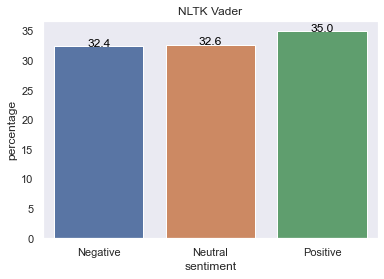

In [35]:
sns.set_theme(style="dark")
ax = sns.barplot(x="sentiment", y="percentage", data=nltk_sentiment_df)
ax.set_title('NLTK Vader')

for index, row in nltk_sentiment_df.iterrows():
    ax.text(row.name,row.percentage, round(row.percentage,1), color='black', ha="center")

In [36]:
#TEXTBLOB

# Obtain polarity scores generated by TextBlob
data['textblob_score'] = data['cleaned'].apply(lambda x: TextBlob(x).sentiment.polarity)

neutral_thresh = 0.05

# Convert polarity score into sentiment categories
data['textblob_sentiment'] = data['textblob_score'].apply(lambda c: 'Positive' if c >= neutral_thresh else ('Negative' if c <= -(neutral_thresh) else 'Neutral'))

data['textblob_score'].describe()

count    10001.000000
mean         0.052144
std          0.219497
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.133929
max          1.000000
Name: textblob_score, dtype: float64

In [37]:
textblob_sentiment_df = get_value_counts('textblob_sentiment','TextBlob')
textblob_sentiment_df

,sentiment,counts,percentage,analyzer
0,Negative,1846,18.46,TextBlob
1,Neutral,4551,45.51,TextBlob
2,Positive,3604,36.04,TextBlob


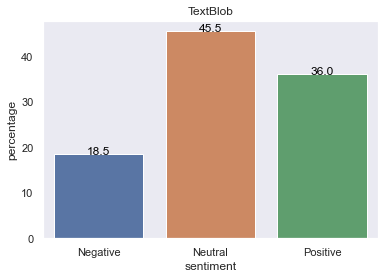

In [38]:
sns.set_theme(style="dark")
ax = sns.barplot(x="sentiment", y="percentage", data=textblob_sentiment_df)
ax.set_title('TextBlob')

for index, row in textblob_sentiment_df.iterrows():
    ax.text(row.name,row.percentage, round(row.percentage,1), color='black', ha="center")

In [39]:
#STANZA

nlp = stanza.Pipeline(lang='en', processors='tokenize,sentiment')

def stanza_analyze(Text):
    document = nlp(Text)
    print('Processing')
    return np.mean([(i.sentiment - 1) for i in document.sentences]) # Minus 1 so as to bring score range of [0,2] to [-1,1]

# Obtain sentiment categorical score generated by Stanza
data['stanza_score'] = data['cleaned'].apply(lambda x: stanza_analyze(x))

neutral_thresh = 0.05

data['stanza_score'].describe()

2021-12-31 05:46:13 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| sentiment | sstplus  |

2021-12-31 05:46:13 INFO: Use device: cpu
2021-12-31 05:46:13 INFO: Loading: tokenize
2021-12-31 05:46:13 INFO: Loading: sentiment
2021-12-31 05:46:14 INFO: Done loading processors!


Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing

C:\Anaconda\envs\myenv\lib\site-packages\numpy\core\fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing

count    9998.000000
mean       -0.380376
std         0.595566
min        -1.000000
25%        -1.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: stanza_score, dtype: float64

In [40]:
# Convert average Stanza sentiment score into sentiment categories
data['stanza_sentiment'] = data['stanza_score'].apply(lambda c: 'Positive' if c >= neutral_thresh else ('Negative' if c <= -(neutral_thresh) else 'Neutral'))

stanza_sentiment_df = get_value_counts('stanza_sentiment','Stanza')
stanza_sentiment_df

,sentiment,counts,percentage,analyzer
0,Negative,4403,44.03,Stanza
1,Neutral,5001,50.00,Stanza
2,Positive,597,5.97,Stanza


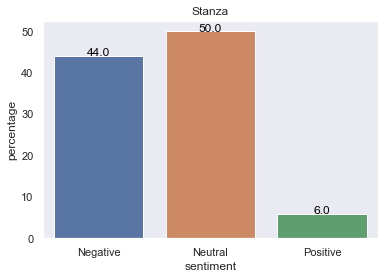

In [41]:
sns.set_theme(style="dark")
ax = sns.barplot(x="sentiment", y="percentage", data=stanza_sentiment_df)
ax.set_title('Stanza')

for index, row in stanza_sentiment_df.iterrows():
    ax.text(row.name,row.percentage, round(row.percentage,1), color='black', ha="center")

In [42]:
#INSIGHTS FROM SENTIMENT ANALYSIS

df_sentiments = pd.concat([nltk_sentiment_df, 
                           textblob_sentiment_df, 
                           stanza_sentiment_df,
                          ]).reset_index(drop=True)
df_sentiments

,sentiment,counts,percentage,analyzer
0,Negative,3239,32.39,NLTK Vader
1,Neutral,3265,32.65,NLTK Vader
2,Positive,3497,34.97,NLTK Vader
3,Negative,1846,18.46,TextBlob
4,Neutral,4551,45.51,TextBlob
5,Positive,3604,36.04,TextBlob
6,Negative,4403,44.03,Stanza
7,Neutral,5001,50.00,Stanza
8,Positive,597,5.97,Stanza


In [43]:
df_sentiments_pivot = df_sentiments.pivot(index='sentiment', columns='analyzer', values='percentage')
df_sentiments_pivot

analyzer,NLTK Vader,Stanza,TextBlob
sentiment,,,
Negative,32.39,44.03,18.46
Neutral,32.65,50.00,45.51
Positive,34.97,5.97,36.04


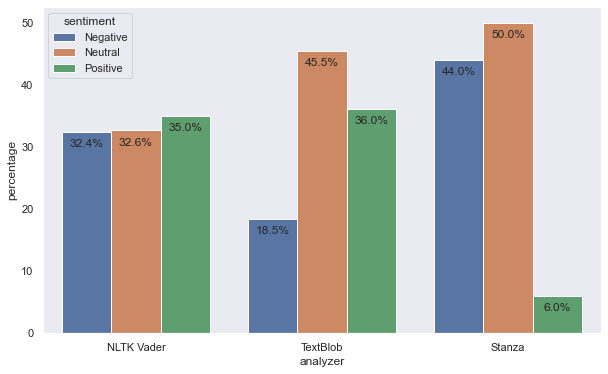

In [44]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x="analyzer", y="percentage",
                 hue="sentiment", data=df_sentiments)

# Display annotations
for p in ax.patches:
    ax.annotate(f"{round(p.get_height(),1)}%", 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12,
                   xytext = (0, -12), 
                   textcoords = 'offset points')

In [45]:
###AVERAGING BASED ENSEMBLE MODEL###

# Make use of sentiments from NLTK Vader, TextBlob and Stanza
data['composite_score'] =  (data['nltk_cmp_score'] 
                                + data['textblob_score']
                                + data['stanza_score'])/3

data['composite_score'].describe()

count    9998.000000
mean       -0.108177
std         0.320405
min        -0.975800
25%        -0.333333
50%        -0.033333
75%         0.033333
max         0.951833
Name: composite_score, dtype: float64

In [46]:
# Threshold for neutral sentiment
neutral_thresh = 0.05

# Convert average sentiment score (from all 3 analyzers) into sentiment categories
data['composite_vote_2'] = data['composite_score'].apply(lambda c: 'Positive' if c >= neutral_thresh else ('Negative' if c <= -(neutral_thresh) else 'Neutral'))

composite_sentiment_df_2 = get_value_counts('composite_vote_2','Composite Sentiment')
composite_sentiment_df_2

,sentiment,counts,percentage,analyzer
0,Negative,4855,48.55,Composite Sentiment
1,Neutral,2823,28.23,Composite Sentiment
2,Positive,2323,23.23,Composite Sentiment


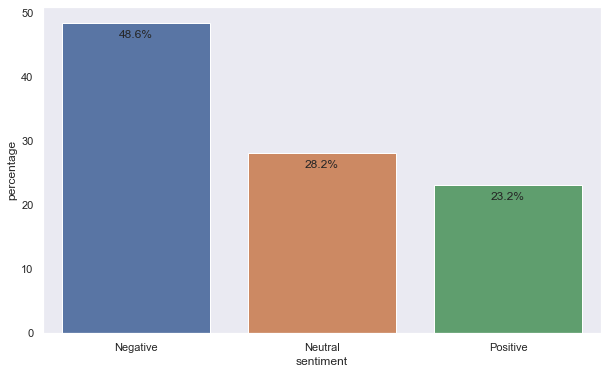

In [47]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x="sentiment", y="percentage",
                 data=composite_sentiment_df_2)

# Display annotations
for p in ax.patches:
    ax.annotate(f"{round(p.get_height(),1)}%", 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12,
                   xytext = (0, -12), 
                   textcoords = 'offset points')

In [48]:
###VOTING BASED ESEMBLE MODEL###

# Make use of sentiments from NLTK Vader, TextBlob and Stanza
data['sentiment_votes'] =  data.apply(lambda x: list([x['nltk_sentiment'], 
                                                                x['textblob_sentiment'], 
                                                                x['stanza_sentiment']]),axis=1)

# Create function to get sentiment that appears most often amongst the 3 votes
def get_most_voted_senti(List):
    if len(List) == len(set(List)): # If all elements are different
        return 'Neutral'
    else:
        return max(set(List), key = List.count)

# Get composite sentiment vote
data['composite_vote'] = data['sentiment_votes'].apply(lambda x: get_most_voted_senti(x))

composite_sentiment_df = get_value_counts('composite_vote','Composite Sentiment (Max Voting)')


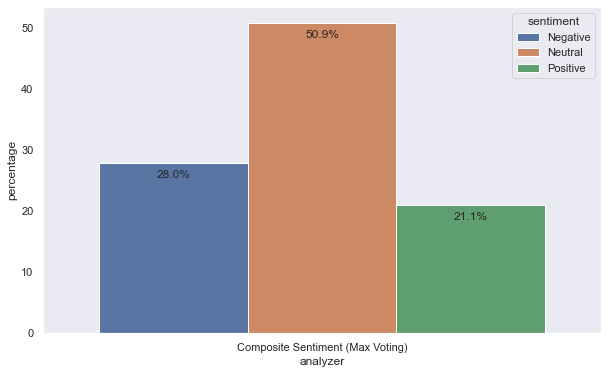

In [49]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x="analyzer", y="percentage",
                 hue="sentiment", data=composite_sentiment_df)

# Display annotations
for p in ax.patches:
    ax.annotate(f"{round(p.get_height(),1)}%", 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12,
                   xytext = (0, -12), 
                   textcoords = 'offset points')

In [50]:
###KEYWORD EXTRACTION###

positive_tweet= data[data['nltk_sentiment'] == 'Positive']['cleaned']
negative_tweet= data[data['nltk_sentiment'] == 'Negative']['cleaned']
neutral_tweet= data[data['nltk_sentiment'] == 'Neutral']['cleaned']

# positive_tweet

In [51]:
###EXTRACTING MOST COMMON WORDS###


# Removing stopwords
positive_tweet_list=positive_tweet.apply(nfx.remove_stopwords).tolist()
negative_tweet_list=negative_tweet.apply(nfx.remove_stopwords).tolist()
neutral_tweet_list=neutral_tweet.apply(nfx.remove_stopwords).tolist()

# Tokenization
for line in positive_tweet_list:
    for token in line.split():
        print(token)
pos_tokens = [token for line in positive_tweet_list for token in line.split()]
neg_tokens = [token for line in negative_tweet_list for token in line.split()]
neut_tokens = [token for line in neutral_tweet_list for token in line.split()]

from collections import Counter
def get_tokens(docx,num=30):
    word_tokens= Counter(docx)
    most_common=word_tokens.most_common(num)
    result= dict(most_common)
    return result
# get_tokens(neg_tokens)
most_common_pos_words= get_tokens(pos_tokens)
most_common_neg_words= get_tokens(neg_tokens)
most_common_neut_words= get_tokens(neut_tokens) 
                
# Plotting Most common words
pos_df= pd.DataFrame(most_common_pos_words.items(),columns=['words','count'])
neg_df= pd.DataFrame(most_common_neg_words.items(),columns=['words','count'])
neut_df=pd.DataFrame(most_common_neut_words.items(),columns=['words','count'])

double
jabbed
hospital
covid
wish
hope
recovers
covid
vaxx
🙏💪
gov
want
admit
vaccines
increased
real
virus
covid
vaccine
spreading
real
virus
opinion
person
altered
based
covid
vaccine
status
piece
shit
congratulations
got
covid
booster
shot
yesterday
effect
slight
soreness
injection
site
super
powers
metal
doesn’t
stick
cell
phone
service
sucks
i’m
chipped
it’s
vaccine
covidbooster
getvaccinated
confident
giving
under12
yr
old
covid
vaccine
we’ve
got
parent
national
signed
kid
phase
3
clinical
trials
reason
advice
excellent
headline
segment
tonight
hi
joe
got
flu
shot
week
got
pneumonia
vaccine
safe
today
got
email
medicare
informing
im
eligible
moderna
booster
vaccine
covid
walk
appt
ok
tuesday
wednesday
prince
harry
meghan
markle
urge
g20
leader
share
surplus
covid19
vaccine
thrilled
fda
cleared
covidvaccine
511
year
old
children
28
million
child
eligible
including
daughter
cdc
clearance
can’t
come
fast
supreme
court
decline
block
maine
covid19
vaccine
mandate
study
showing
vaccine


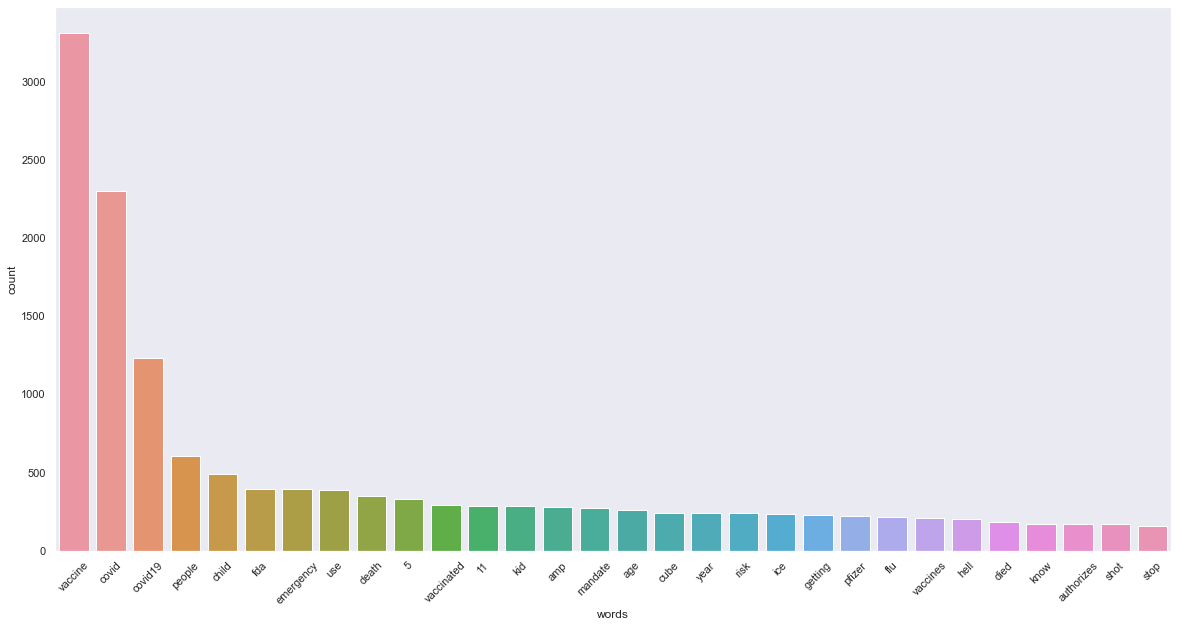

In [52]:
# Plotting graph for most common words in Negative sentiment tweets
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='count',data=neg_df)
plt.xticks(rotation=45)
plt.show()

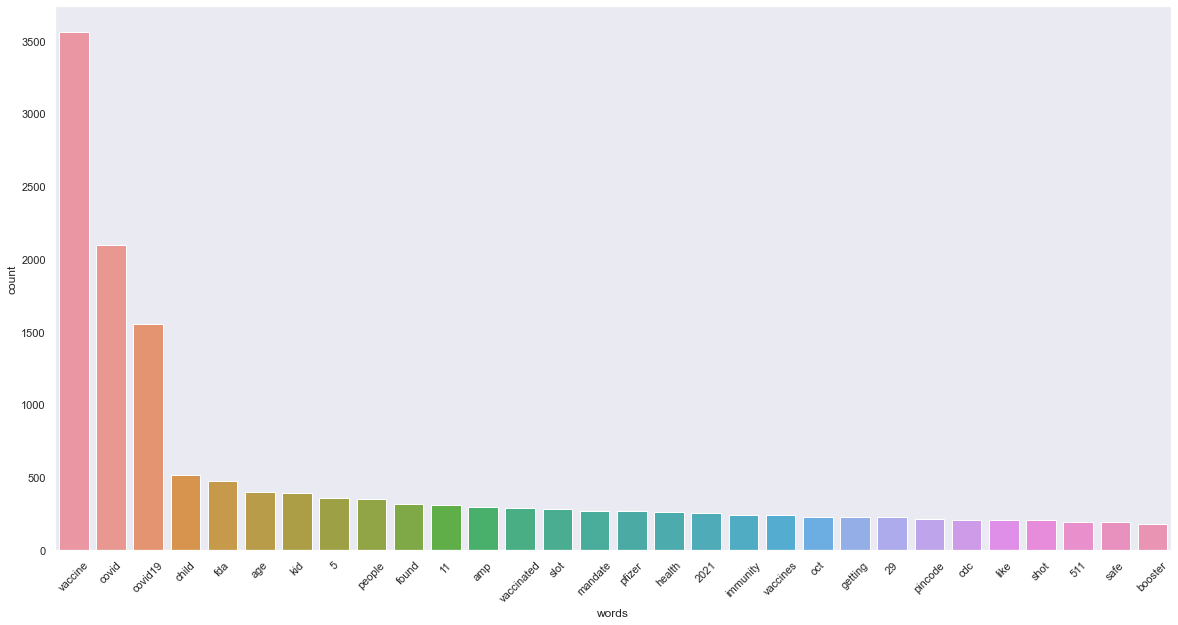

In [53]:
# Plotting graph for most common words in Positive sentiment tweets
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='count',data=pos_df)
plt.xticks(rotation=45)
plt.show()

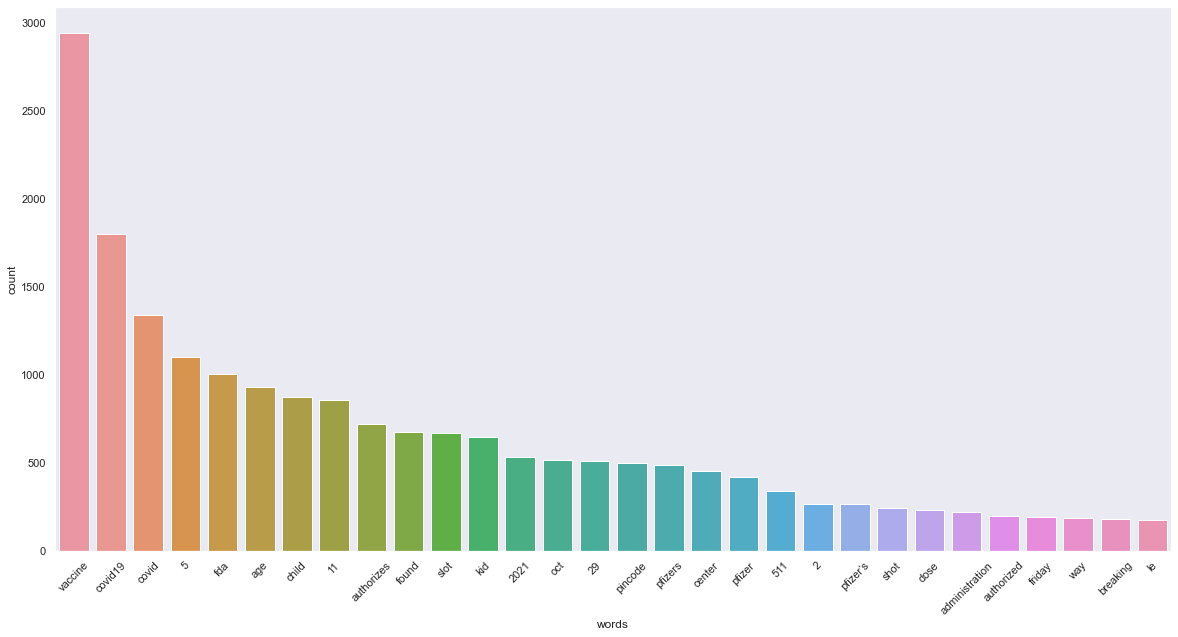

In [54]:
# Plotting graph for most common words in Neutral sentiment tweets
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='count',data=neut_df)
plt.xticks(rotation=45)
plt.show()

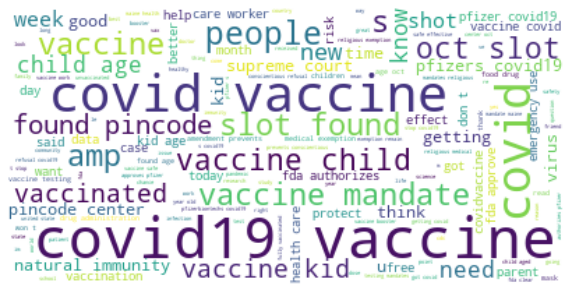

In [55]:
###WORD CLOUD###

def plot_wordcloud(docx):
    plt.figure(figsize=(10,10))
    mywordcloud= WordCloud(background_color='white').generate(docx)
    plt.imshow(mywordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Plotting WordCloud for Positive, Negative and Neutral sentiments
pos_docx=' '.join(pos_tokens)
neg_docx=' '.join(neg_tokens)
neut_docx=' '.join(neut_tokens)

plot_wordcloud(pos_docx)

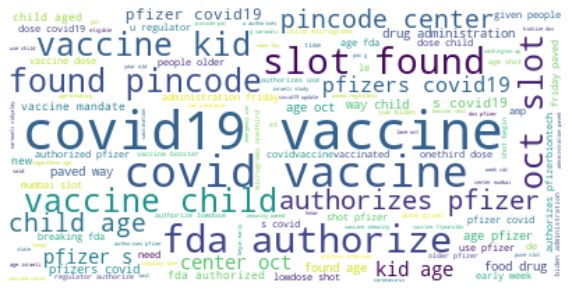

In [56]:
plot_wordcloud(neut_docx)

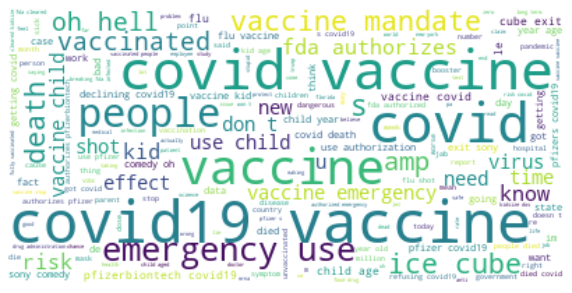

In [57]:
plot_wordcloud(neg_docx)

In [58]:
###CLASSIFICATION MODELS###


data['polarity'] = data['lemmatized Tweets'].apply(lambda x: TextBlob(x).sentiment[0])
data['subjectivity'] = data['lemmatized Tweets'].apply(lambda x: TextBlob(x).sentiment[1])
data.head()

,datetime,text,cleantweet1,Sentence_Length,Word Counts,character_count,Stop Words,processedtweets,cleaned,tokenized Tweets,...,textblob_score,textblob_sentiment,stanza_score,stanza_sentiment,composite_score,composite_vote_2,sentiment_votes,composite_vote,polarity,subjectivity
0,2021-10-29 23:59:59+00:00,@njs44 double jabbed in the hospital #covid is not over i wish him well \n\ni hope he recovers f...,double jabbed in the hospital is not over i wish him well i hope he recovers from covid vaxx 🙏💪...,1,39,174,24,@njs44 double jabbed hospital #covid wish well hope recovers covid vaxx 🙏💪 gov want admit #vacci...,double jabbed hospital covid wish well hope recovers covid vaxx 🙏💪 gov want admit vaccines incr...,"[, double, jabbed, hospital, covid, wish, well, hope, recovers, covid, vaxx, gov, want, admit, v...",...,0.133333,Positive,-1.0,Negative,0.001778,Neutral,"[Positive, Positive, Negative]",Positive,0.133333,0.200000
1,2021-10-29 23:59:55+00:00,@debjcoons1 @borys_kit @kimmasters if your opinion of a person can be altered based on their cov...,if your opinion of a person can be altered based on their covid vaccine status then you're a pi...,2,25,135,14,@debjcoons1 @borys_kit @kimmasters opinion person altered based covid vaccine status piece shit....,opinion person altered based covid vaccine status piece shit congratulations,"[, opinion, person, altered, based, covid, vaccine, status, piece, shit, congratulations]",...,-0.200000,Negative,-1.0,Negative,-0.374267,Negative,"[Positive, Negative, Negative]",Negative,-0.500000,0.900000
2,2021-10-29 23:59:52+00:00,"@c_smith951 @annniebuhr @ap in the us alone 202 kids age 0-4 have died, 455 age 5-18. the vaccin...","in the us alone 202 kids age 0-4 have died, 455 age 5-18. the vaccine is safe. covid is not. if...",3,38,164,21,"@c_smith951 @annniebuhr @ap u alone 202 kid age 0-4 died, 455 age 5-18. vaccine safe. covid not....",u alone 202 kid age 04 died 455 age 518 vaccine safe covid not stay around eventually variant...,"[, u, alone, 202, kid, age, 04, died, 455, age, 518, vaccine, safe, covid, not, stay, around, ev...",...,0.250000,Positive,-1.0,Negative,-0.383967,Negative,"[Negative, Positive, Negative]",Negative,0.250000,0.312500
3,2021-10-29 23:59:50+00:00,@lewislama now yr gaslighting. no one ever said anything was risk free. 32.7 million doses of co...,now yr gaslighting. no one ever said anything was risk free. 32.7 million doses of covid-19 vac...,5,49,241,29,@lewislama yr gaslighting. one ever said anything risk free. 32.7 million dos covid-19 vaccine g...,yr gaslighting one ever said anything risk free 327 million dos covid19 vaccine given far tga f...,"[, yr, gaslighting, one, ever, said, anything, risk, free, 327, million, dos, covid19, vaccine, ...",...,0.033333,Neutral,-1.0,Negative,-0.435556,Negative,"[Negative, Neutral, Negative]",Negative,0.033333,0.833333
4,2021-10-29 23:59:46+00:00,got my covid booster shot yesterday. \nthe only side effect has been slight soreness at the inje...,got my covid booster shot yesterday. the only side effect has been slight soreness at the inject...,3,46,228,27,"got covid booster shot yesterday. side effect slight soreness injection site. super powers, meta...",got covid booster shot yesterday side effect slight soreness injection site super powers metal d...,"[got, covid, booster, shot, yesterday, side, effect, slight, soreness, injection, site, super, p...",...,-0.044444,Neutral,-1.0,Negative,-0.234815,Negative,"[Positive, Neutral, Negative]",Neutral,0.083333,0.416667


In [59]:
def get_text_analysis(x):
    if x<0:
        return 'Negative'
    elif x == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
data['score01'] = data['polarity'].apply(get_text_analysis)
data.head()

,datetime,text,cleantweet1,Sentence_Length,Word Counts,character_count,Stop Words,processedtweets,cleaned,tokenized Tweets,...,textblob_sentiment,stanza_score,stanza_sentiment,composite_score,composite_vote_2,sentiment_votes,composite_vote,polarity,subjectivity,score01
0,2021-10-29 23:59:59+00:00,@njs44 double jabbed in the hospital #covid is not over i wish him well \n\ni hope he recovers f...,double jabbed in the hospital is not over i wish him well i hope he recovers from covid vaxx 🙏💪...,1,39,174,24,@njs44 double jabbed hospital #covid wish well hope recovers covid vaxx 🙏💪 gov want admit #vacci...,double jabbed hospital covid wish well hope recovers covid vaxx 🙏💪 gov want admit vaccines incr...,"[, double, jabbed, hospital, covid, wish, well, hope, recovers, covid, vaxx, gov, want, admit, v...",...,Positive,-1.0,Negative,0.001778,Neutral,"[Positive, Positive, Negative]",Positive,0.133333,0.200000,Positive
1,2021-10-29 23:59:55+00:00,@debjcoons1 @borys_kit @kimmasters if your opinion of a person can be altered based on their cov...,if your opinion of a person can be altered based on their covid vaccine status then you're a pi...,2,25,135,14,@debjcoons1 @borys_kit @kimmasters opinion person altered based covid vaccine status piece shit....,opinion person altered based covid vaccine status piece shit congratulations,"[, opinion, person, altered, based, covid, vaccine, status, piece, shit, congratulations]",...,Negative,-1.0,Negative,-0.374267,Negative,"[Positive, Negative, Negative]",Negative,-0.500000,0.900000,Negative
2,2021-10-29 23:59:52+00:00,"@c_smith951 @annniebuhr @ap in the us alone 202 kids age 0-4 have died, 455 age 5-18. the vaccin...","in the us alone 202 kids age 0-4 have died, 455 age 5-18. the vaccine is safe. covid is not. if...",3,38,164,21,"@c_smith951 @annniebuhr @ap u alone 202 kid age 0-4 died, 455 age 5-18. vaccine safe. covid not....",u alone 202 kid age 04 died 455 age 518 vaccine safe covid not stay around eventually variant...,"[, u, alone, 202, kid, age, 04, died, 455, age, 518, vaccine, safe, covid, not, stay, around, ev...",...,Positive,-1.0,Negative,-0.383967,Negative,"[Negative, Positive, Negative]",Negative,0.250000,0.312500,Positive
3,2021-10-29 23:59:50+00:00,@lewislama now yr gaslighting. no one ever said anything was risk free. 32.7 million doses of co...,now yr gaslighting. no one ever said anything was risk free. 32.7 million doses of covid-19 vac...,5,49,241,29,@lewislama yr gaslighting. one ever said anything risk free. 32.7 million dos covid-19 vaccine g...,yr gaslighting one ever said anything risk free 327 million dos covid19 vaccine given far tga f...,"[, yr, gaslighting, one, ever, said, anything, risk, free, 327, million, dos, covid19, vaccine, ...",...,Neutral,-1.0,Negative,-0.435556,Negative,"[Negative, Neutral, Negative]",Negative,0.033333,0.833333,Positive
4,2021-10-29 23:59:46+00:00,got my covid booster shot yesterday. \nthe only side effect has been slight soreness at the inje...,got my covid booster shot yesterday. the only side effect has been slight soreness at the inject...,3,46,228,27,"got covid booster shot yesterday. side effect slight soreness injection site. super powers, meta...",got covid booster shot yesterday side effect slight soreness injection site super powers metal d...,"[got, covid, booster, shot, yesterday, side, effect, slight, soreness, injection, site, super, p...",...,Neutral,-1.0,Negative,-0.234815,Negative,"[Positive, Neutral, Negative]",Neutral,0.083333,0.416667,Positive


In [60]:
positive = data[data['score01'] == 'Positive']
print(str(positive.shape))
print(str((positive.shape[0]/data.shape[0])*100) + '% positive tweets!')
pos = positive.shape[0]/data.shape[0]*100

(3803, 26)
38.02619738026197% positive tweets!


In [61]:
negative = data[data['score01'] == 'Negative']
print(str(negative.shape))
print(str((negative.shape[0]/data.shape[0])*100) + '% negative tweets!')
neg = negative.shape[0]/data.shape[0]*100

(2006, 26)
20.05799420057994% negative tweets!


In [62]:
neutral = data[data['score01'] == 'Neutral']
print(str(neutral.shape))
print(str((neutral.shape[0]/data.shape[0])*100) + '% neutal tweets!')
neut = neutral.shape[0]/data.shape[0]*100

(4192, 26)
41.91580841915808% neutal tweets!


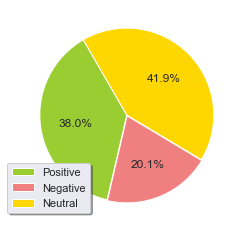

In [63]:
explode=[0,0.01,0]
labels='Positive','Negative','Neutral'
sizes=[pos,neg,neut]
colors=['yellowgreen','lightcoral','gold']

plt.pie(sizes,explode=explode,autopct='%1.1f%%',colors=colors, startangle=120)
plt.legend(labels,loc=(-0.05,0.05),shadow=True)
# plt.axis('equal')


<BarContainer object of 3 artists>

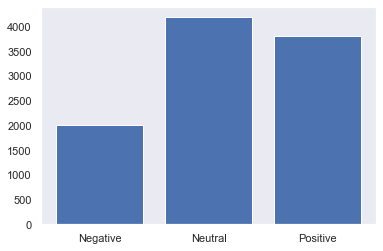

In [64]:
labels = data.groupby('score01').count().index.values
values = data.groupby('score01').size().values
plt.bar(labels,values)

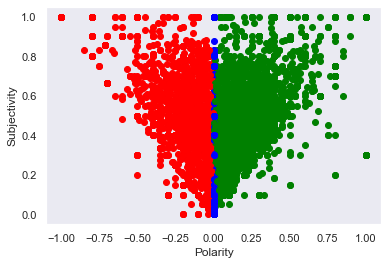

In [65]:
for index, row in data.iterrows():
    if row['score01'] == 'Positive':
        plt.scatter(row['polarity'], row['subjectivity'], color='green')
    elif row['score01'] == 'Negative':
        plt.scatter(row['polarity'], row['subjectivity'], color='red')
    else:
        plt.scatter(row['polarity'], row['subjectivity'], color='blue')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [66]:
data.groupby('score01').describe()

#data.to_csv(r'pakistan_astra_zaneca_final_results.csv', index = False)

Sentence_Length                                                \
                   count      mean       std  min  25%  50%  75%   max   
score01                                                                  
Negative          2006.0  2.307079  1.363002  1.0  1.0  2.0  3.0  11.0   
Neutral           4192.0  1.437977  0.905440  0.0  1.0  1.0  2.0  11.0   
Positive          3803.0  2.088614  1.301795  0.0  1.0  2.0  3.0  11.0   

         Word Counts             ... polarity               subjectivity  \
               count       mean  ...      75%           max        count   
score01                          ...                                       
Negative      2006.0  35.266700  ...   -0.100 -2.775558e-17       2006.0   
Neutral       4192.0  20.777195  ...    0.000  0.000000e+00       4192.0   
Positive      3803.0  31.974231  ...    0.325  1.000000e+00       3803.0   

                                                                           
              mean       std       min       25%       50%       75%  max  
score01                                                                    
Negative  0.459273  0.257020  0.000000  0.250000  0.450000  0.638304  1.0  
Neutral   0.058900  0.178360  0.000000  0.000000  0.000000  0.000000  1.0  
Positive  0.465169  0.196339  0.041667  0.333333  0.454545  0.567857  1.0  

[3 rows x 80 columns]

In [67]:
###Multinomial Naive Bayes, Bernoulli Naive Bayes, K Nearest Neighbor, Linear Regression, Decision Trees###

models = data[['lemmatized Tweets', 'score01']]
models

,lemmatized Tweets,score01
0,double jabbed hospital covid wish well hope recovers covid vaxx 🙏💪 gov want admit vaccine increa...,Positive
1,opinion person alter base covid vaccine status piece shit congratulation,Negative
2,u alone 202 kid age 04 die 455 age 518 vaccine safe covid not stay around eventually variant pop...,Positive
3,yr gaslighting one ever say anything risk free 327 million do covid19 vaccine give far tga found...,Positive
4,get covid booster shot yesterday side effect slight soreness injection site super power metal do...,Positive
...,...,...
9996,meeting covid19 vaccine commitment – sign open letter g20,Neutral
9997,high vaccinate rate see case covid stop vaccine mandate make variant,Positive
9998,thank you btw understand covid19 vaccine use adjuvant include novavax i trial unfortunately get ...,Negative
9999,mozambique portugal sends another 200000 covid19 vaccine saturday mocambique,Neutral


In [68]:
models['score01'] = pd.Categorical(models.score01)
models.dtypes

C:\Anaconda\envs\myenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


lemmatized Tweets      object
score01              category
dtype: object

In [69]:
models['score01'].value_counts()

Neutral     4192
Positive    3803
Negative    2006
Name: score01, dtype: int64

In [70]:
bow_transformer = CountVectorizer().fit(models['lemmatized Tweets'])
bow_transformer.vocabulary_

{'double': 4406,
 'jabbed': 6884,
 'hospital': 6257,
 'covid': 3555,
 'wish': 13231,
 'well': 13119,
 'hope': 6235,
 'recovers': 10166,
 'vaxx': 12784,
 'gov': 5780,
 'want': 13032,
 'admit': 1357,
 'vaccine': 12643,
 'increase': 6553,
 'real': 10106,
 'virus': 12903,
 'spread': 11357,
 'opinion': 8884,
 'person': 9266,
 'alter': 1556,
 'base': 2154,
 'status': 11422,
 'piece': 9359,
 'shit': 10992,
 'congratulation': 3339,
 'alone': 1543,
 '202': 452,
 'kid': 7097,
 'age': 1423,
 '04': 25,
 'die': 4155,
 '455': 758,
 '518': 824,
 'safe': 10632,
 'not': 8617,
 'stay': 11426,
 'around': 1841,
 'eventually': 4934,
 'variant': 12756,
 'pop': 9493,
 'hit': 6173,
 'everyone': 4939,
 'same': 10664,
 'yr': 13406,
 'gaslighting': 5595,
 'one': 8842,
 'ever': 4935,
 'say': 10725,
 'anything': 1731,
 'risk': 10480,
 'free': 5466,
 '327': 649,
 'million': 8009,
 'do': 4329,
 'covid19': 3558,
 'give': 5705,
 'far': 5132,
 'tga': 11874,
 'found': 5430,
 'report': 10310,
 'death': 3896,
 'link': 744

In [71]:
lemma_bow = bow_transformer.transform(models['lemmatized Tweets'])
print(lemma_bow)

  (0, 1357)	1
  (0, 3555)	3
  (0, 4406)	1
  (0, 5780)	1
  (0, 6235)	1
  (0, 6257)	1
  (0, 6553)	1
  (0, 6884)	1
  (0, 10106)	2
  (0, 10166)	1
  (0, 11357)	1
  (0, 12643)	2
  (0, 12784)	1
  (0, 12903)	2
  (0, 13032)	1
  (0, 13119)	1
  (0, 13231)	1
  (1, 1556)	1
  (1, 2154)	1
  (1, 3339)	1
  (1, 3555)	1
  (1, 8884)	1
  (1, 9266)	1
  (1, 9359)	1
  (1, 10992)	1
  :	:
  (9999, 12643)	1
  (10000, 484)	1
  (10000, 599)	1
  (10000, 610)	1
  (10000, 668)	1
  (10000, 1765)	1
  (10000, 3031)	1
  (10000, 3071)	1
  (10000, 3077)	1
  (10000, 3221)	1
  (10000, 3555)	1
  (10000, 7386)	1
  (10000, 7440)	1
  (10000, 7656)	1
  (10000, 7836)	1
  (10000, 8768)	1
  (10000, 8772)	1
  (10000, 8818)	1
  (10000, 9387)	2
  (10000, 10087)	1
  (10000, 12041)	1
  (10000, 12547)	1
  (10000, 12643)	1
  (10000, 13015)	1
  (10000, 13118)	1


In [72]:
x = lemma_bow.toarray()
print(x)

x.shape

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(10001, 13636)

In [73]:
tfidf_transformer = TfidfTransformer().fit(lemma_bow)

text_tfidf = tfidf_transformer.transform(lemma_bow)
print(text_tfidf)
print(text_tfidf.shape)

  (0, 13231)	0.2418826971414523
  (0, 13119)	0.16461193612923591
  (0, 13032)	0.17340253661672328
  (0, 12903)	0.33080029075285966
  (0, 12784)	0.25531998251199456
  (0, 12643)	0.07778917223651517
  (0, 11357)	0.16435300303977182
  (0, 10166)	0.3413134876487963
  (0, 10106)	0.43517953661262787
  (0, 6884)	0.24419718256203055
  (0, 6553)	0.2170249995146163
  (0, 6257)	0.17356895026612468
  (0, 6235)	0.2064290391332541
  (0, 5780)	0.2113370936949011
  (0, 4406)	0.22181371261140662
  (0, 3555)	0.17717788222750752
  (0, 1357)	0.2569882868991143
  (1, 12643)	0.05467925582866659
  (1, 11422)	0.34500940892057164
  (1, 10992)	0.33138243612998614
  (1, 9359)	0.4039997884071556
  (1, 9266)	0.29139087466233593
  (1, 8884)	0.33410829226335786
  (1, 3555)	0.08302744860208708
  (1, 3339)	0.39388276309751197
  :	:
  (9999, 435)	0.3909031861506912
  (10000, 13118)	0.18952564925592552
  (10000, 13015)	0.15968175567652487
  (10000, 12643)	0.028080227633722147
  (10000, 12547)	0.2359158890914404
  (10000

In [74]:
#MODELS EVALUATION
def model_Evaluate(model):
    # Predict values for Test dataset
    predictions = model.predict(text_tfidf)
    # Print the evaluation metrics for the dataset.
    print(classification_report(models['score01'], predictions))
    # Compute and plot the Confusion matrix
    print(confusion_matrix(models['score01'], predictions))
    # Accuracy
    print("Accuracy:",metrics.accuracy_score(models['score01'], predictions))
    


In [75]:
#MULTINOMIAL NB

MNBmodel = MultinomialNB()
MNBmodel.fit(text_tfidf, models['score01'])
model_Evaluate(MNBmodel)
mnb_pred = MNBmodel.predict(text_tfidf)
models['nb_predictions'] = mnb_pred

models['nb_score'] = pd.Categorical(models.nb_predictions)
models['nb_score'] = pd.factorize(models['nb_score'])[0]
# models['nb_score'] = models['nb_score'].cat.codes
# models['nb_score'] = models['nb_score'].replace(['Positive','Negative','Neutral'],[2,1,0])
models.head()

              precision    recall  f1-score   support

    Negative       0.99      0.37      0.54      2006
     Neutral       0.88      0.81      0.84      4192
    Positive       0.66      0.93      0.77      3803

    accuracy                           0.77     10001
   macro avg       0.84      0.70      0.72     10001
weighted avg       0.82      0.77      0.75     10001

[[ 739  218 1049]
 [   1 3401  790]
 [   7  262 3534]]
Accuracy: 0.7673232676732327


C:\Anaconda\envs\myenv\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Anaconda\envs\myenv\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Anaconda\envs\myenv\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

,lemmatized Tweets,score01,nb_predictions,nb_score
0,double jabbed hospital covid wish well hope recovers covid vaxx 🙏💪 gov want admit vaccine increa...,Positive,Positive,0
1,opinion person alter base covid vaccine status piece shit congratulation,Negative,Positive,0
2,u alone 202 kid age 04 die 455 age 518 vaccine safe covid not stay around eventually variant pop...,Positive,Positive,0
3,yr gaslighting one ever say anything risk free 327 million do covid19 vaccine give far tga found...,Positive,Positive,0
4,get covid booster shot yesterday side effect slight soreness injection site super power metal do...,Positive,Positive,0


In [76]:
##BERNOULLI NB
BNBmodel = BernoulliNB()
BNBmodel.fit(text_tfidf, models['score01'])
model_Evaluate(BNBmodel)
bnb_pred = BNBmodel.predict(text_tfidf)
models['bnb_predictions'] = bnb_pred

models['bnb_score'] = pd.Categorical(models.bnb_predictions)
models['bnb_score'] = pd.factorize(models['bnb_score'])[0]
models.head()

              precision    recall  f1-score   support

    Negative       0.94      0.60      0.74      2006
     Neutral       0.84      0.87      0.86      4192
    Positive       0.77      0.88      0.82      3803

    accuracy                           0.82     10001
   macro avg       0.85      0.79      0.80     10001
weighted avg       0.83      0.82      0.82     10001

[[1213  256  537]
 [  53 3655  484]
 [  19  435 3349]]
Accuracy: 0.8216178382161784


C:\Anaconda\envs\myenv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Anaconda\envs\myenv\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Anaconda\envs\myenv\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

,lemmatized Tweets,score01,nb_predictions,nb_score,bnb_predictions,bnb_score
0,double jabbed hospital covid wish well hope recovers covid vaxx 🙏💪 gov want admit vaccine increa...,Positive,Positive,0,Positive,0
1,opinion person alter base covid vaccine status piece shit congratulation,Negative,Positive,0,Positive,0
2,u alone 202 kid age 04 die 455 age 518 vaccine safe covid not stay around eventually variant pop...,Positive,Positive,0,Positive,0
3,yr gaslighting one ever say anything risk free 327 million do covid19 vaccine give far tga found...,Positive,Positive,0,Positive,0
4,get covid booster shot yesterday side effect slight soreness injection site super power metal do...,Positive,Positive,0,Positive,0


In [77]:
#KNN CLASSIFICATION
KNNmodel = neighbors.KNeighborsClassifier()
KNNmodel.fit(text_tfidf, models['score01'])
model_Evaluate(KNNmodel)
knn_pred = KNNmodel.predict(text_tfidf)
models['knn_predictions'] = knn_pred

models['knn_score'] = pd.Categorical(models.knn_predictions)
models['knn_score'] = pd.factorize(models['knn_score'])[0]
models.head()


              precision    recall  f1-score   support

    Negative       0.97      0.28      0.43      2006
     Neutral       0.49      0.99      0.66      4192
    Positive       0.96      0.24      0.39      3803

    accuracy                           0.56     10001
   macro avg       0.81      0.50      0.49     10001
weighted avg       0.77      0.56      0.51     10001

[[ 557 1440    9]
 [   5 4162   25]
 [  12 2865  926]]
Accuracy: 0.5644435556444356


C:\Anaconda\envs\myenv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Anaconda\envs\myenv\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Anaconda\envs\myenv\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

,lemmatized Tweets,score01,nb_predictions,nb_score,bnb_predictions,bnb_score,knn_predictions,knn_score
0,double jabbed hospital covid wish well hope recovers covid vaxx 🙏💪 gov want admit vaccine increa...,Positive,Positive,0,Positive,0,Neutral,0
1,opinion person alter base covid vaccine status piece shit congratulation,Negative,Positive,0,Positive,0,Neutral,0
2,u alone 202 kid age 04 die 455 age 518 vaccine safe covid not stay around eventually variant pop...,Positive,Positive,0,Positive,0,Neutral,0
3,yr gaslighting one ever say anything risk free 327 million do covid19 vaccine give far tga found...,Positive,Positive,0,Positive,0,Neutral,0
4,get covid booster shot yesterday side effect slight soreness injection site super power metal do...,Positive,Positive,0,Positive,0,Neutral,0


In [78]:
#LOGISTIC REGRESSION
LRmodel = LogisticRegression()
LRmodel.fit(text_tfidf, models['score01'])
model_Evaluate(LRmodel)
lr_pred = LRmodel.predict(text_tfidf)
models['lr_predictions'] = lr_pred

models['lr_score'] = pd.Categorical(models.lr_predictions)
models['lr_score'] = pd.factorize(models['lr_score'])[0]
models.head()


C:\Anaconda\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

    Negative       0.98      0.83      0.90      2006
     Neutral       0.93      0.98      0.96      4192
    Positive       0.94      0.96      0.95      3803

    accuracy                           0.94     10001
   macro avg       0.95      0.92      0.94     10001
weighted avg       0.95      0.94      0.94     10001

[[1670  170  166]
 [  11 4114   67]
 [  23  126 3654]]
Accuracy: 0.9437056294370563


C:\Anaconda\envs\myenv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Anaconda\envs\myenv\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Anaconda\envs\myenv\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

,lemmatized Tweets,score01,nb_predictions,nb_score,bnb_predictions,bnb_score,knn_predictions,knn_score,lr_predictions,lr_score
0,double jabbed hospital covid wish well hope recovers covid vaxx 🙏💪 gov want admit vaccine increa...,Positive,Positive,0,Positive,0,Neutral,0,Positive,0
1,opinion person alter base covid vaccine status piece shit congratulation,Negative,Positive,0,Positive,0,Neutral,0,Negative,1
2,u alone 202 kid age 04 die 455 age 518 vaccine safe covid not stay around eventually variant pop...,Positive,Positive,0,Positive,0,Neutral,0,Positive,0
3,yr gaslighting one ever say anything risk free 327 million do covid19 vaccine give far tga found...,Positive,Positive,0,Positive,0,Neutral,0,Positive,0
4,get covid booster shot yesterday side effect slight soreness injection site super power metal do...,Positive,Positive,0,Positive,0,Neutral,0,Positive,0


In [79]:
###ENSEMBLE RESULTS###

models['nb_predictions'] = pd.Categorical(models.nb_predictions)
models['bnb_predictions'] = pd.Categorical(models.bnb_predictions)
models['knn_predictions'] = pd.Categorical(models.knn_predictions)
models['lr_predictions'] = pd.Categorical(models.lr_predictions)
#models['dt_predictions'] = pd.Categorical(models.dt_predictions)

models.dtypes

C:\Anaconda\envs\myenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda\envs\myenv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Anaconda\envs\myenv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

lemmatized Tweets      object
score01              category
nb_predictions       category
nb_score                int64
bnb_predictions      category
bnb_score               int64
knn_predictions      category
knn_score               int64
lr_predictions       category
lr_score                int64
dtype: object

In [80]:
models['combined_sentiments'] =  models.apply(lambda x: list([x['nb_predictions'], 
                                                                x['bnb_predictions'], 
                                                                x['knn_predictions'],
                                                                x['lr_predictions']]),axis=1)
#x['dt_predictions']]),

C:\Anaconda\envs\myenv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [81]:
def get_most_voted_senti(List):
    if len(List) == len(set(List)): # If all elements are different
        return 'Neutral'
    else:
        return max(set(List), key = List.count)

In [82]:
models['combined_sentiments_vote'] = models['combined_sentiments'].apply(lambda x: get_most_voted_senti(x))

C:\Anaconda\envs\myenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [83]:
models['combined_sentiments_vote'].value_counts()

Positive    4606
Neutral     4044
Negative    1351
Name: combined_sentiments_vote, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


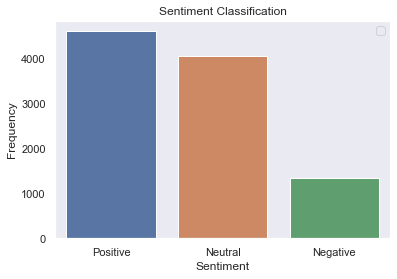

In [84]:
sns.set_theme(style='dark')
ax=sns.barplot(x=models['combined_sentiments_vote'].value_counts().index.values,y=models['combined_sentiments_vote'].value_counts().values,data=models)
plt.legend(loc=1)
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Sentiment Classification')
plt.show()

In [85]:
predictions = models['combined_sentiments_vote']
print("Accuracy:",metrics.accuracy_score(models['score01'], predictions))
print(classification_report(models['score01'], predictions))

Accuracy: 0.8685131486851315
              precision    recall  f1-score   support

    Negative       0.99      0.66      0.79      2006
     Neutral       0.92      0.89      0.90      4192
    Positive       0.79      0.96      0.86      3803

    accuracy                           0.87     10001
   macro avg       0.90      0.84      0.85     10001
weighted avg       0.88      0.87      0.87     10001

